In [1]:
import torch
import torchvision.models as models
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Helper Utils

In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load VGG-16

In [127]:
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).features
print(vgg16)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

# Load Image

In [3]:
!wget -q "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Tiger_Drinking_Pond_Mudumalai_Mar21_DSC01310.jpg/960px-Tiger_Drinking_Pond_Mudumalai_Mar21_DSC01310.jpg" -O tiger.jpg

In [8]:
original_image = Image.open("/content/tiger.jpg")

transformed_image = transform(original_image)

In [15]:
print(f"Original Image Shape: {original_image.size}")
print(
        f"Original Min Pixel Value: {np.min(np.array(original_image))}",
        f"Original Max  Pixel Value: {np.max(np.array(original_image))}"
     )

print(f"Transformed Image Shape: {transformed_image.shape}")
print(
        f"Transformed Min Pixel Value: {torch.min(transformed_image)}"
        f"Transformed Max Pixel Value: {torch.max(transformed_image)}"
     )

Original Image Shape: (960, 720)
Original Min Pixel Value: 0 Original Max  Pixel Value: 255
Transformed Image Shape: torch.Size([3, 224, 224])
Transformed Min Pixel Value: -1.8267831802368164Transformed Max Pixel Value: 2.5005664825439453


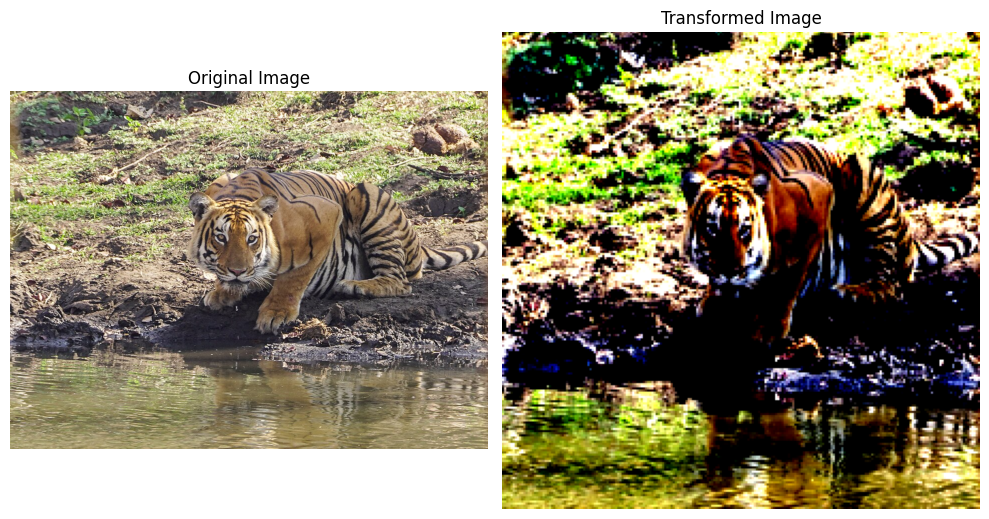

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(original_image)
ax[0].title.set_text("Original Image")
ax[0].axis("off")

ax[1].imshow(transformed_image.permute(1, 2, 0))
ax[1].title.set_text("Transformed Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()

Shape of `channels_to_visualize`: torch.Size([3, 1, 224, 224])
Shape of `grid_img`: torch.Size([3, 228, 680])


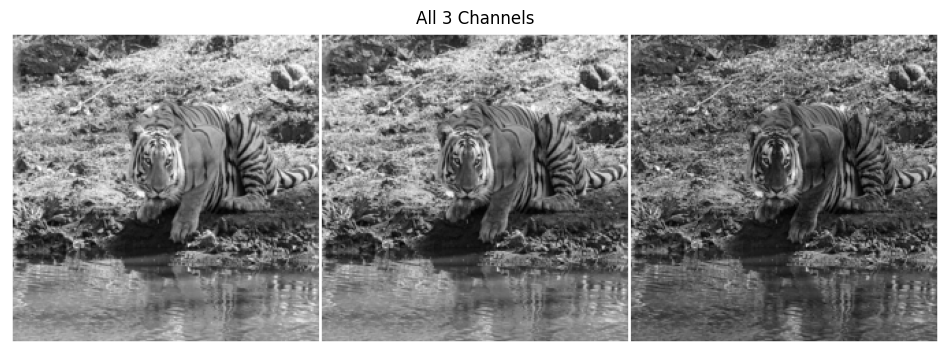

In [81]:
# Visualize the individual channels of the input image
# `transformed_image` is a PyTorch tensor of shape [C, H, W] = [3, 224, 224]
# To display individual channels using make_grid, we need to expand it to [C, 1, H, W]
channels_to_visualize = transformed_image.unsqueeze(1)
print(f"Shape of `channels_to_visualize`: {channels_to_visualize.shape}")

grid_img = make_grid(channels_to_visualize,
                     nrow=channels_to_visualize.shape[0], # Display all channels in one row
                     padding=2,
                     pad_value=1,
                     normalize=True,
                     scale_each=True)
print(f"Shape of `grid_img`: {grid_img.shape}")

plt.figure(figsize=(12, 12))
plt.imshow(grid_img.permute(1, 2, 0).detach().numpy())
plt.title(f"All {transformed_image.shape[0]} Channels")
plt.axis("off")
plt.show()

# Visulize VGG-16 CNN

In [ ]:
#Set the model to evaluation mode
vgg16.eval()

In [33]:
# for i , layer in enumerate(vgg16):
#   print(f"layer no.: {i}, layer: {layer}")

# Get only CNN layers
cnn_layers = []
for i , layer in enumerate(vgg16):
  if isinstance(layer, torch.nn.Conv2d):
    cnn_layers.append(layer)


In [50]:
print(cnn_layers)

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))]


## 1st CNN Layer

In [64]:
input_batch = transform(original_image).unsqueeze(0)
print(f"Shape of `input_batch`: {input_batch.shape}")

cnn_output = cnn_layers[0](input_batch) # 1st method
print(f"Shape of `cnn_output`: {cnn_output.shape}")

Shape of `input_batch`: torch.Size([1, 3, 224, 224])
Shape of `cnn_output`: torch.Size([1, 64, 224, 224])


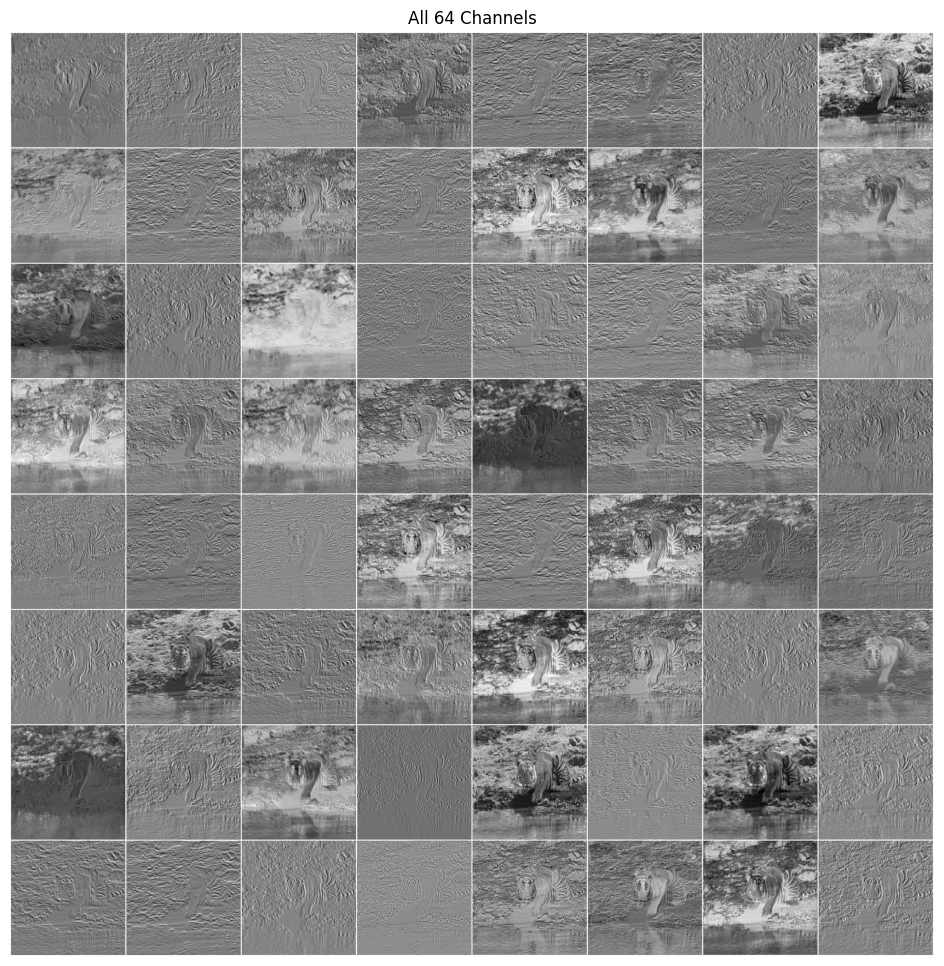

In [87]:
cnn_output = cnn_layers[0](input_batch)
# (B, C, H, W) => (C, 1, H, W)
# cnn_output = cnn_output.permute(1, 0, 2, 3)
cnn_output = cnn_output.squeeze(0).unsqueeze(1)

grid_img = make_grid(cnn_output,
                      nrow=8,
                      padding=2,
                      pad_value=1,
                      normalize=True,
                      scale_each=True)
plt.figure(figsize=(12, 12))
plt.imshow(grid_img.permute(1, 2, 0).detach().numpy())
plt.title(f"All {cnn_output.shape[0]} Channels")
plt.axis("off")
plt.show()

Shape of kernels: torch.Size([64, 3, 3, 3])


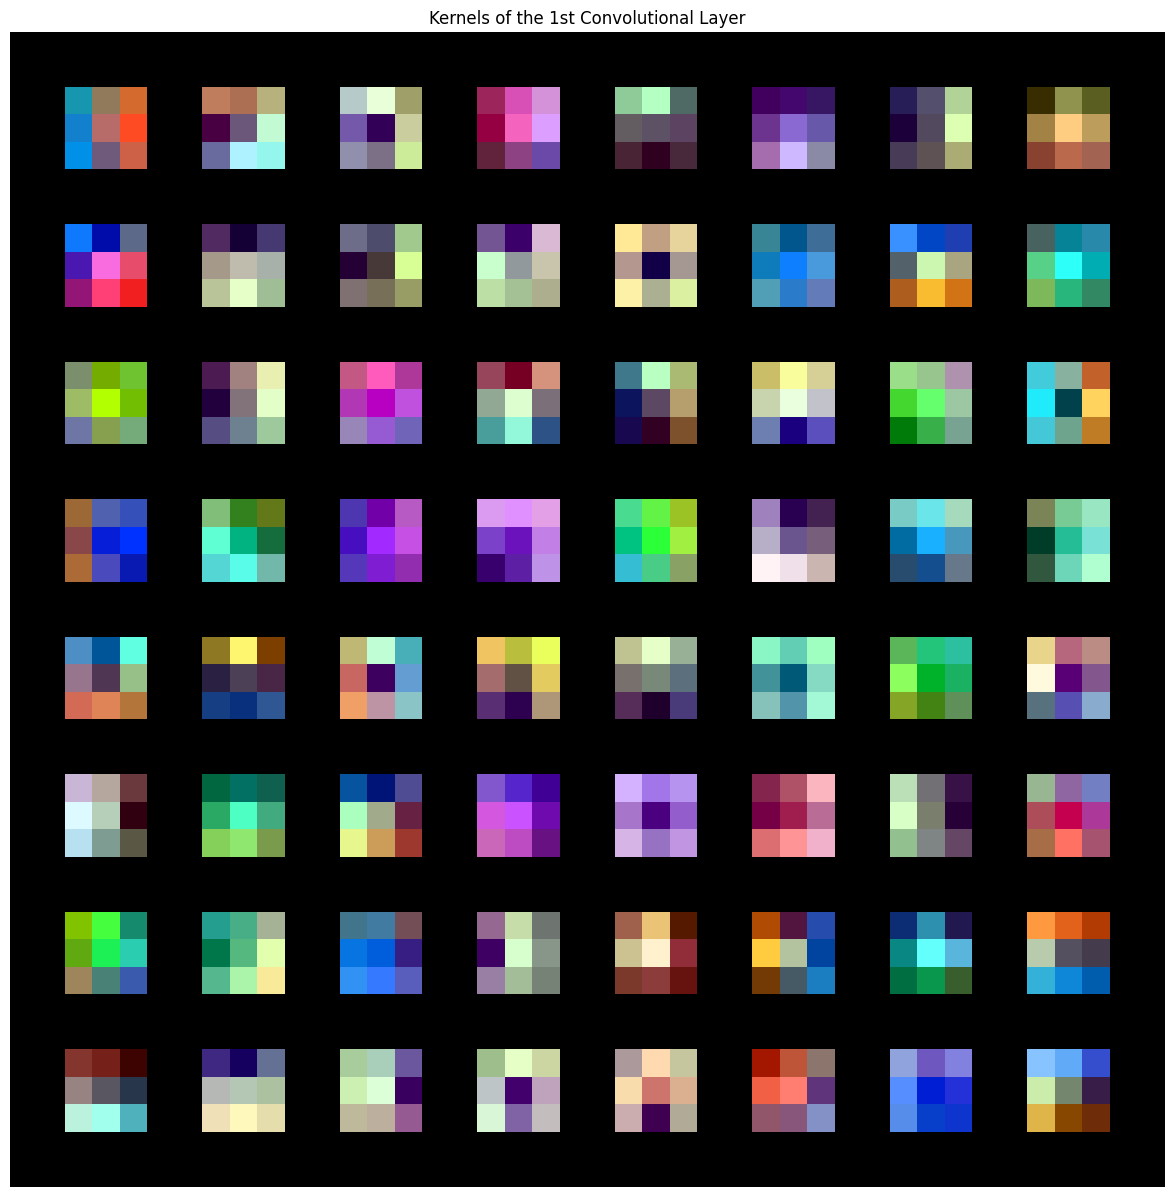

In [66]:
# Access the weights of the first Conv2d layer
kernels = cnn_layers[0].weight.data
print(f"Shape of kernels: {kernels.shape}")

# The kernels are of shape [out_channels, in_channels, kernel_height, kernel_width]
# For the first layer, this is [64, 3, 3, 3] (64 output filters, 3 input channels, 3x3 spatial dimensions).
# make_grid can visualize these directly as 3-channel images.

grid_img_kernels = make_grid(kernels,
                             nrow=8, # Display 8 kernels per row
                             padding=2,
                             normalize=True,
                             scale_each=True)

plt.figure(figsize=(15, 15))
plt.imshow(grid_img_kernels.permute(1, 2, 0).detach().cpu().numpy())
plt.title("Kernels of the 1st Convolutional Layer")
plt.axis("off")
plt.show()

## n^th CNN Layer

In [93]:
import math

def get_nrow(n):
  # For a more square-like grid, it's common to use the ceiling of the square root
  # Ensure the return value is an integer as 'nrow' expects an integer
  return int(math.ceil(math.sqrt(n)))

In [75]:
# # cnn_layers[0].in_channels
# # cnn_layers[0].out_channels
# cnn_layers[0].kernel_size
# cnn_layers[0].stride
# cnn_layers[0].padding
# cnn_layers[0].dilation
# cnn_layers[0].groups
# cnn_layers[0].bias
# cnn_layers[0].padding_mode
# cnn_layers[0].output_padding
# cnn_layers[0].dilation
# cnn_layers[0].weight.shape
# cnn_layers[0].bias.shape

torch.Size([64])

####  Get nth layer friture map

In [103]:
def get_n_layer_friture_map(cnn_layer, input_batch):
  cnn_output = cnn_layer(input_batch)
  cnn_output = cnn_output.squeeze(0).unsqueeze(1)

  grid_img = make_grid(cnn_output,
                        nrow=get_nrow(cnn_layer.out_channels),
                        padding=2,
                        pad_value=1,
                        normalize=True,
                        scale_each=True)
  plt.figure(figsize=(12, 12))
  plt.imshow(grid_img.permute(1, 2, 0).detach().numpy())
  plt.title(f"All {cnn_output.shape[0]} Channels")
  plt.axis("off")
  plt.show()

In [107]:
def visualize_intermediate_cnn_feature_maps(model, initial_input_batch, cnn_layer_index_to_visualize):
    """
    Visualizes the feature maps from a specific Conv2d layer within a sequential model.

    Args:
        model (torch.nn.Module): The full sequential model (e.g., vgg16.features).
        initial_input_batch (torch.Tensor): The initial input tensor to the model.
        cnn_layer_index_to_visualize (int): The index of the Conv2d layer within the 'cnn_layers' list
                                            whose feature maps are to be visualized.
    """
    # Get the target Conv2d layer from the pre-extracted cnn_layers list
    target_cnn_layer = cnn_layers[cnn_layer_index_to_visualize]

    # Find the corresponding index of this target Conv2d layer within the full 'model'
    vgg_layer_idx = -1
    current_cnn_layer_count = 0
    for i, layer in enumerate(model):
        if isinstance(layer, torch.nn.Conv2d):
            if current_cnn_layer_count == cnn_layer_index_to_visualize:
                vgg_layer_idx = i
                break
            current_cnn_layer_count += 1

    if vgg_layer_idx == -1:
        print(f"Error: Could not find Conv2d layer at cnn_layers index {cnn_layer_index_to_visualize} within the full model.")
        return

    # Compute the intermediate output up to the point just before the target_cnn_layer
    intermediate_output = initial_input_batch
    for i, layer in enumerate(model):
        if i == vgg_layer_idx:
            break # Stop before applying the target_cnn_layer
        intermediate_output = layer(intermediate_output)

    # Now, visualize the feature maps of the target_cnn_layer using the computed intermediate_output
    get_n_layer_friture_map(target_cnn_layer, intermediate_output)


Now you can easily visualize the feature maps of any `Conv2d` layer by just calling this function. For example, to visualize the feature maps of `cnn_layers[4]` (the 5th convolutional layer):

In [111]:
len(cnn_layers)

13

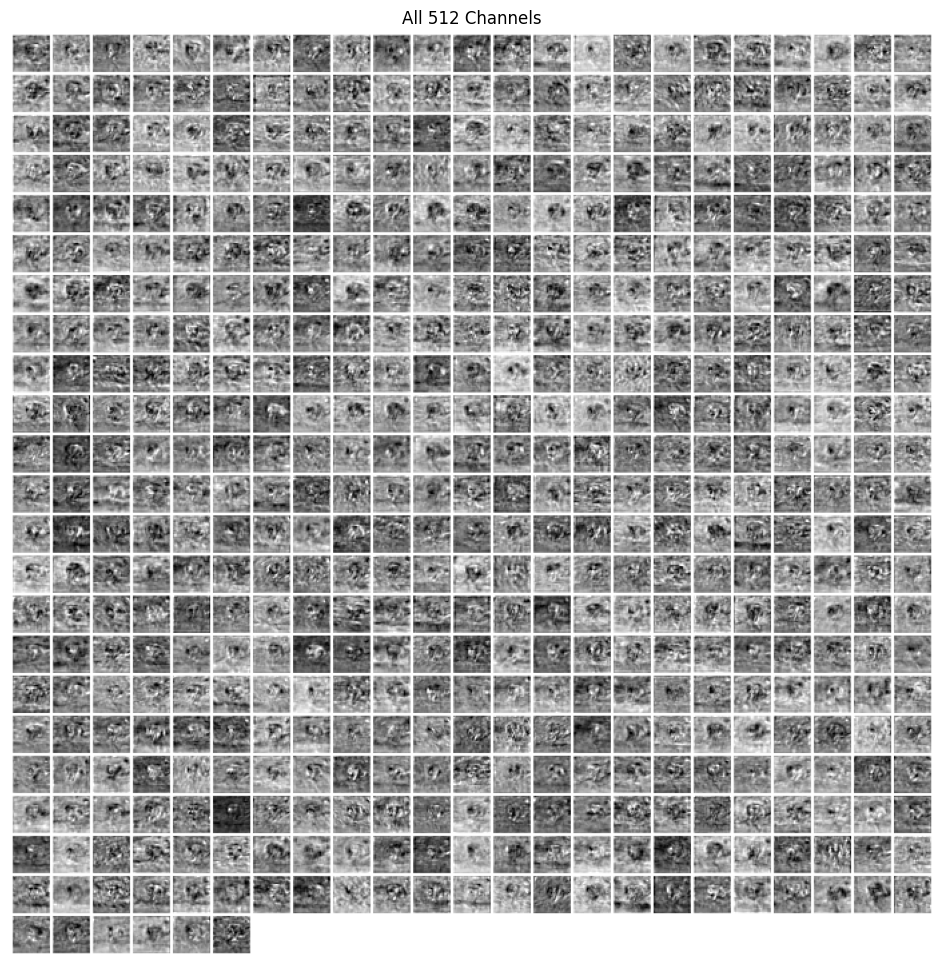

In [114]:
# Visualize feature maps for a different convolutional layer (e.g., index 8 in cnn_layers)
visualize_intermediate_cnn_feature_maps(vgg16, input_batch, 8)

#### Get CNN layer Kernals

In [118]:
def visualize_cnn_layer_kernels(cnn_layers_list, cnn_layer_index):
    """
    Visualizes the kernels (weights) of a specific Conv2d layer.

    Args:
        cnn_layers_list (list): A list containing all Conv2d layers from the model.
        cnn_layer_index (int): The index of the Conv2d layer in `cnn_layers_list`
                                whose kernels are to be visualized.
    """
    if cnn_layer_index < 0 or cnn_layer_index >= len(cnn_layers_list):
        print(f"Error: cnn_layer_index {cnn_layer_index} is out of bounds for cnn_layers_list (size {len(cnn_layers_list)}).")
        return

    target_cnn_layer = cnn_layers_list[cnn_layer_index]
    kernels = target_cnn_layer.weight.data

    print(f"Shape of kernels for cnn_layers[{cnn_layer_index}]: {kernels.shape}")

    out_channels = kernels.shape[0]
    in_channels = kernels.shape[1]

    if in_channels > 3:
        # For deeper layers, in_channels can be large.
        # We average across input channels to get a single grayscale representation for each output filter.
        kernels_to_display = kernels.mean(dim=1, keepdim=True) # Transform to [out_channels, 1, H, W]
        plot_title_suffix = f" (Avg across {in_channels} input channels)"
    else:
        # For first layer (in_channels=3), or if in_channels=1 (grayscale input filters),
        # make_grid can handle it directly.
        kernels_to_display = kernels
        plot_title_suffix = f" (Input channels: {in_channels})"

    grid_img_kernels = make_grid(kernels_to_display,
                                 nrow=get_nrow(out_channels), # Use out_channels for nrow
                                 padding=2,
                                 normalize=True,
                                 scale_each=True)

    plt.figure(figsize=(15, 15))
    plt.imshow(grid_img_kernels.permute(1, 2, 0).detach().cpu().numpy())
    plt.title(f"Kernels of cnn_layers[{cnn_layer_index}] (Output Channels: {out_channels}){plot_title_suffix}")
    plt.axis("off")
    plt.show()

Now you can easily visualize the kernels of any `Conv2d` layer. For example, to visualize the kernels of `cnn_layers[0]` (the first convolutional layer):

Shape of kernels for cnn_layers[0]: torch.Size([64, 3, 3, 3])


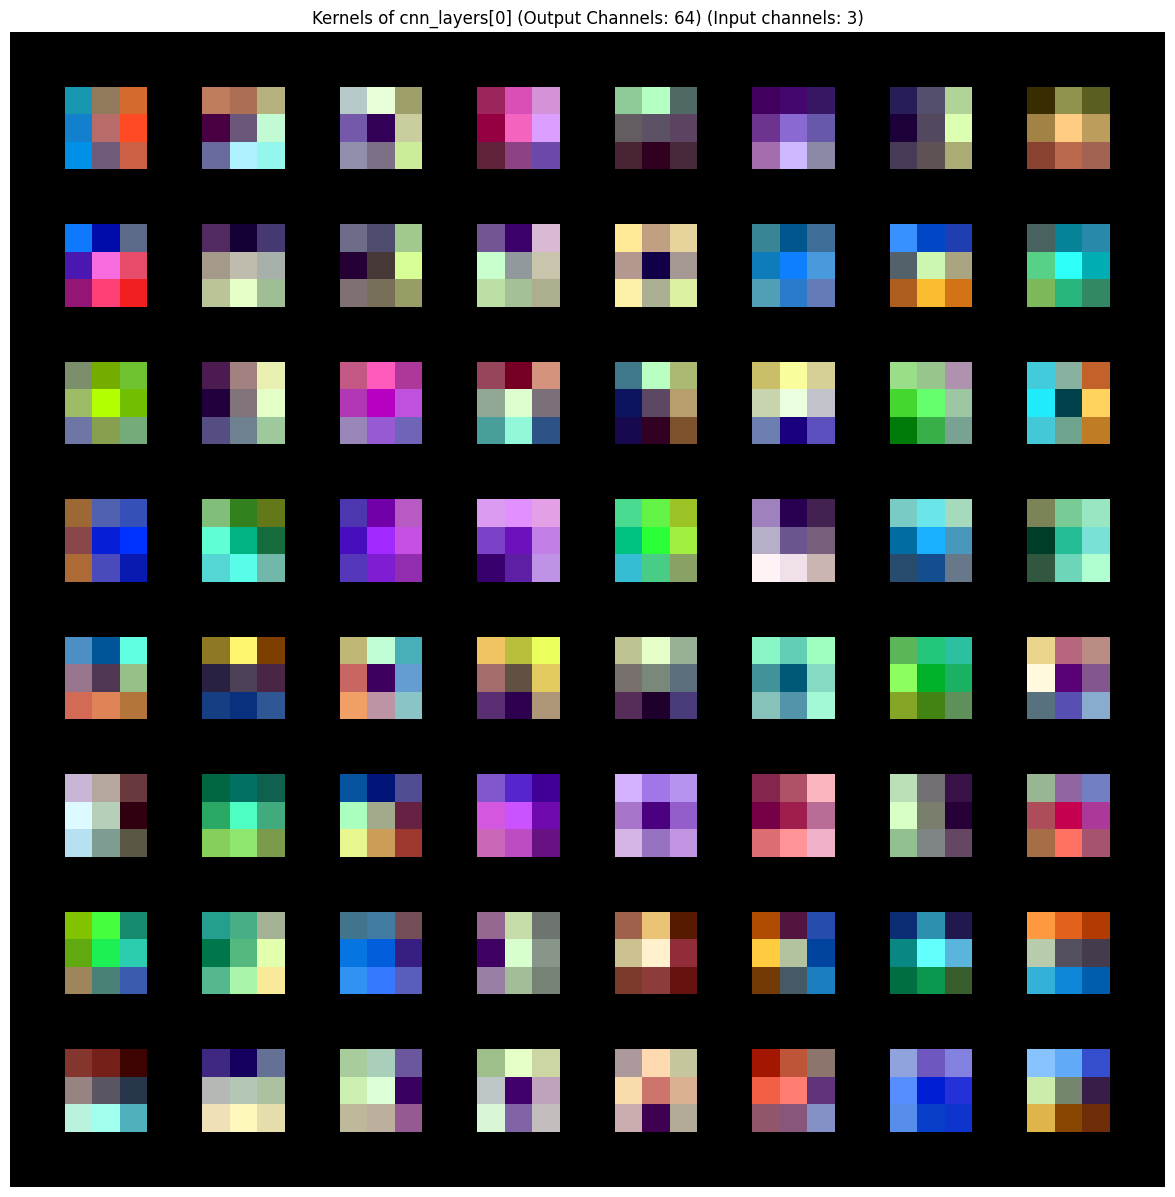

In [120]:
# Visualize kernels for the first convolutional layer (index 0 in cnn_layers)
visualize_cnn_layer_kernels(cnn_layers, 0)

Let's also try visualizing the kernels for a deeper layer, for instance, `cnn_layers[8]`:

Shape of kernels for cnn_layers[8]: torch.Size([512, 512, 3, 3])


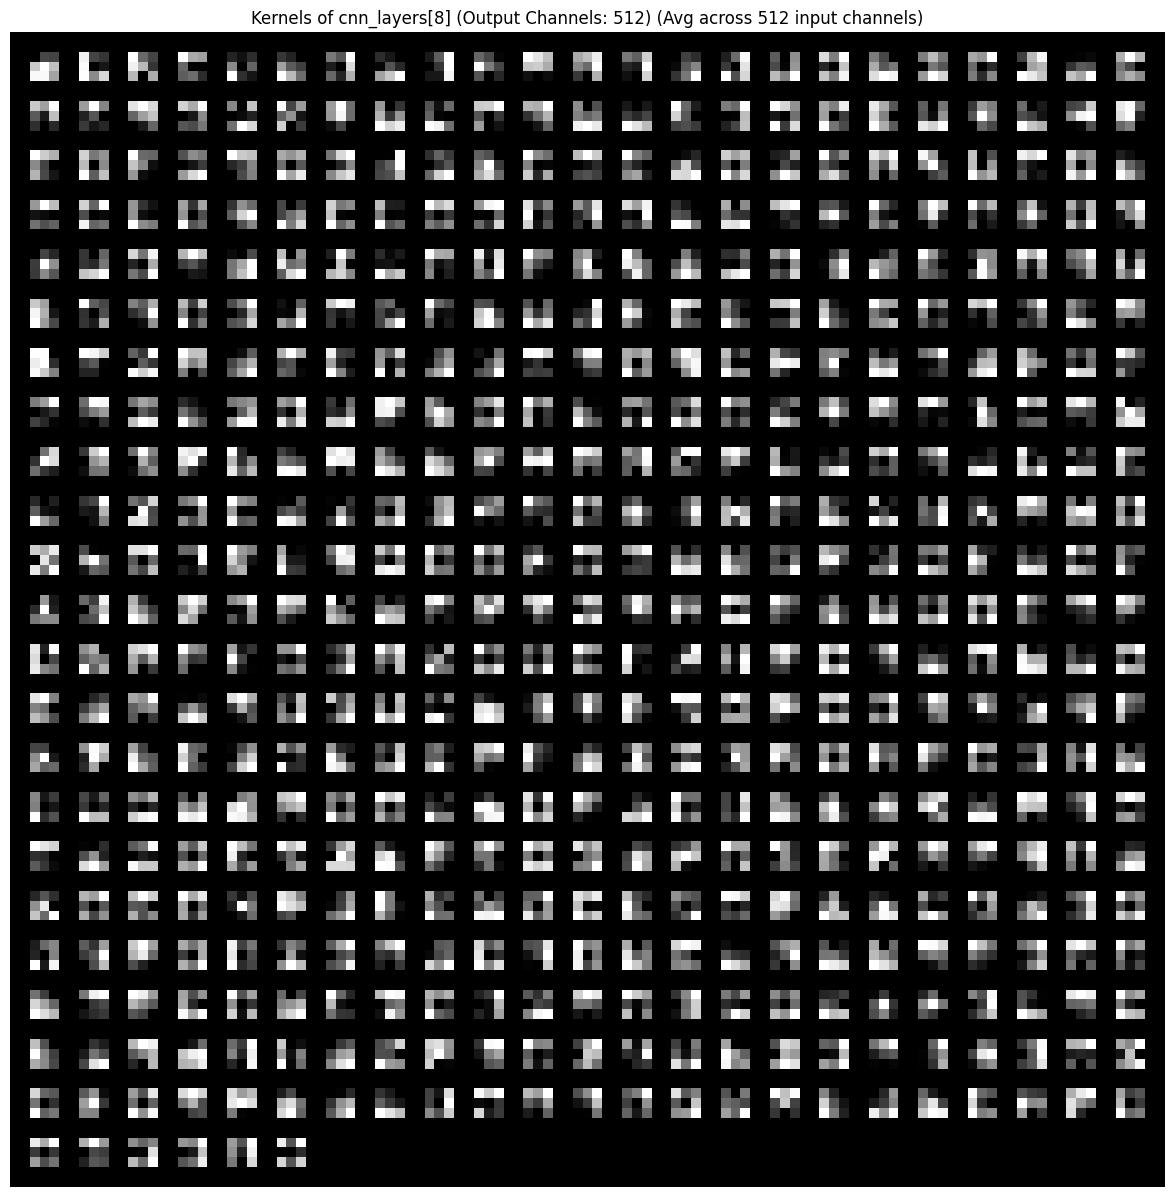

In [123]:
# Visualize kernels for a deeper convolutional layer (index 8 in cnn_layers)
visualize_cnn_layer_kernels(cnn_layers, 8)

## Get freture map of an cnn any given layers

In [ ]:
def get_intermediate_layer_output(model, input_tensor, target_layer_index):
    """
    Computes and returns the output of a specific layer in a sequential model.

    Args:
        model (torch.nn.Module): The full sequential model (e.g., vgg16.features).
        input_tensor (torch.Tensor): The initial input tensor to the model.
        target_layer_index (int): The index of the layer in the sequential model
                                 whose output is to be returned.

    Returns:
        torch.Tensor: The output tensor of the specified layer.
        None: If the target_layer_index is out of bounds.
    """
    if not (0 <= target_layer_index < len(model)):
        print(f"Error: target_layer_index {target_layer_index} is out of bounds for the model (size {len(model)}).")
        return None

    current_output = input_tensor
    for i, layer in enumerate(model):
        current_output = layer(current_output)
        if i == target_layer_index:
            return current_output

    return None # Should not be reached if target_layer_index is valid


In [128]:
def plot_tensor_as_feature_maps(output_tensor, layer_description):
    """
    Visualizes a tensor as feature maps.

    Args:
        output_tensor (torch.Tensor): The tensor to visualize, typically shape [B, C, H, W].
        layer_description (str): A string describing the layer or tensor being visualized.
    """
    if output_tensor is None:
        print(f"Cannot visualize: output tensor for '{layer_description}' is None.")
        return

    # Handle batch dimension: take the first item if batch_size > 1, or squeeze if batch_size == 1
    if output_tensor.dim() == 4:
        if output_tensor.shape[0] > 1:
            print(f"Warning: Tensor for '{layer_description}' has batch size > 1. Visualizing channels of the first item in the batch.")
            tensor_to_plot = output_tensor[0]  # [C, H, W]
        else:
            tensor_to_plot = output_tensor.squeeze(0) # [C, H, W]
    elif output_tensor.dim() == 3: # Already [C, H, W]
        tensor_to_plot = output_tensor
    else:
        print(f"Error: Unsupported tensor dimension for visualization: {output_tensor.dim()} for '{layer_description}'. Expected 3D or 4D tensor.")
        return

    num_channels_to_display = tensor_to_plot.shape[0]

    # For make_grid, convert [C, H, W] to [C, 1, H, W] for grayscale channels,
    # unless C is 3 (for color images).
    if num_channels_to_display != 3:
        tensor_to_plot = tensor_to_plot.unsqueeze(1) # becomes [C, 1, H, W]

    grid_img = make_grid(tensor_to_plot,
                             nrow=get_nrow(num_channels_to_display),
                             padding=2,
                             pad_value=1,
                             normalize=True,
                             scale_each=True)

    plt.figure(figsize=(12, 12))
    plt.imshow(grid_img.permute(1, 2, 0).detach().cpu().numpy()) # Permute for matplotlib
    plt.title(f"Feature Maps of {layer_description} (Channels: {num_channels_to_display})")
    plt.axis("off")
    plt.show()

Now you can use `get_intermediate_layer_output` to obtain the output of any layer. Let's try getting the output of the layer at index 4 (`MaxPool2d`) and index 15 (`ReLU`) from the `vgg16` model.

In [131]:
# Get output of layer at index 4 (MaxPool2d)
output_layer_4 = get_intermediate_layer_output(vgg16, input_batch, 4)
if output_layer_4 is not None:
    print(f"Output of layer 4 (MaxPool2d) shape: {output_layer_4.shape}")

# Get output of layer at index 15 (ReLU)
output_layer_15 = get_intermediate_layer_output(vgg16, input_batch, 15)
if output_layer_15 is not None:
    print(f"Output of layer 15 (ReLU) shape: {output_layer_15.shape}")


Output of layer 4 (MaxPool2d) shape: torch.Size([1, 64, 112, 112])
Output of layer 15 (ReLU) shape: torch.Size([1, 256, 56, 56])


Now, let's use `get_intermediate_layer_output` to get the tensor for layer 4 (`MaxPool2d`) and layer 15 (`ReLU`), and then visualize them using the new `plot_tensor_as_feature_maps` function.

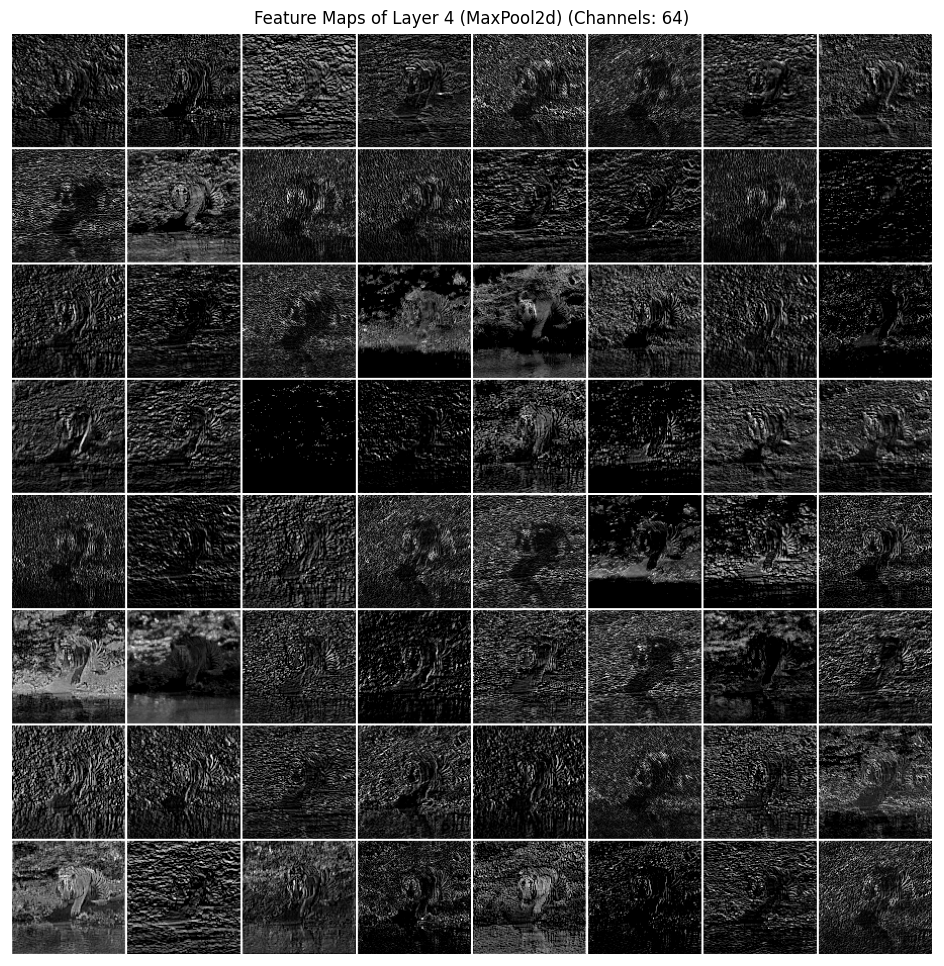

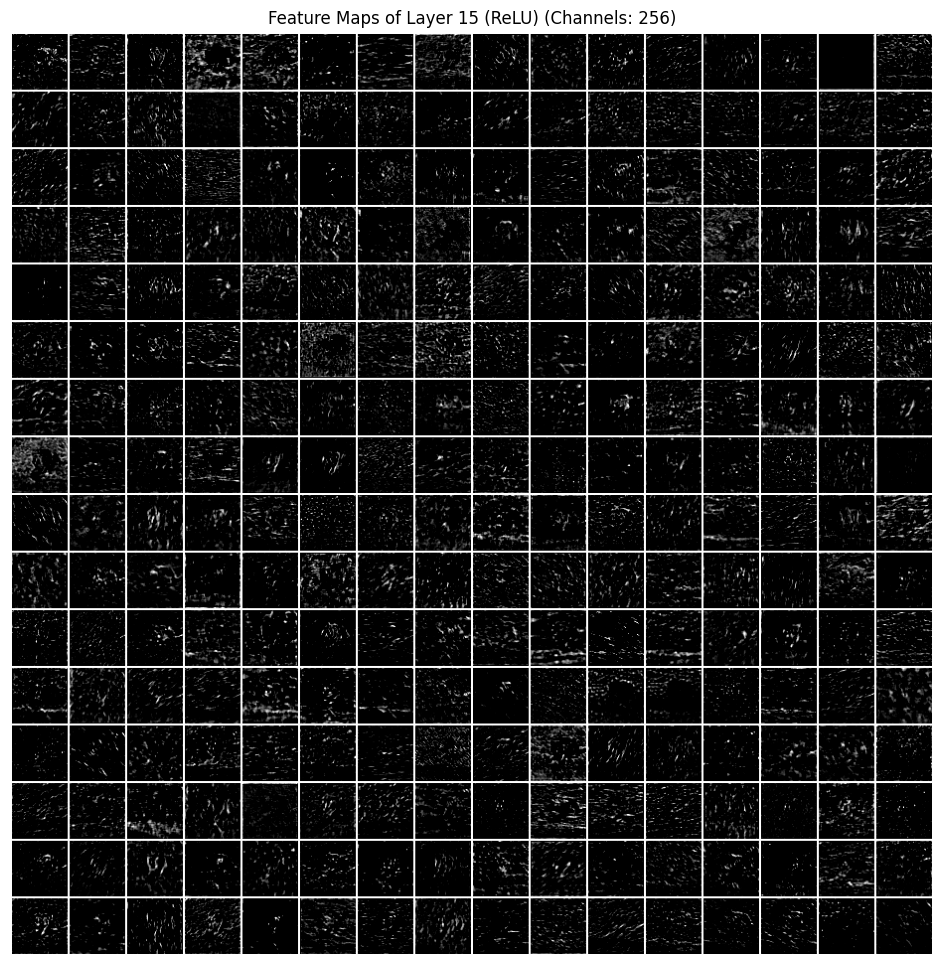

In [130]:
# Get output of layer at index 4 (MaxPool2d)
output_layer_4 = get_intermediate_layer_output(vgg16, input_batch, 4)
plot_tensor_as_feature_maps(output_layer_4, "Layer 4 (MaxPool2d)")

# Get output of layer at index 15 (ReLU)
output_layer_15 = get_intermediate_layer_output(vgg16, input_batch, 15)
plot_tensor_as_feature_maps(output_layer_15, "Layer 15 (ReLU)")